In [1]:
# For reading in MOC files and filtering catalogues
from moc_util import coords_to_hpidx, inMoc
##################################################

import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table

import time

from astropy.coordinates import search_around_sky
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import match_coordinates_sky
from astropy.io import fits
import astropy.wcs as wcs

import pickle


import os
from time import strftime
import glob

# For MOC creation files
import pymoc.io.fits
import healpy as hp
import pymoc.util.catalog
from mocpy import MOC, WCS
from herschelhelp import image_plotting
from herschelhelp_internal.utils import inMoc

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import astropy.wcs as wcs
from astropy.coordinates import SkyCoord
from astropy.nddata.utils import Cutout2D
from astropy.io import ascii, fits
from astropy.table import Table
from astropy import units as u

from herschelhelp import cutouts_server as ctts

In [3]:
lofar = Table.read('data/edited_cats/radio/image_full_ampphase_di_m.NS_shift.blanked.scaled.cat_foverlap.fits')
lofar_gaus = Table.read('data/edited_cats/radio/image_full_ampphase_di_m.NS_shift.blanked.scaled.cat.gaul_foverlap.fits')
lofar_xmatch = Table.read('iterated_endpoints/EN1_ML_RUN_fin_overlap_srl_workflow.fits')

In [4]:
PATH_MASTER_LIST = "data/edited_cats/optical/LH_MASTER_opt_spitzer_merged_forLGZ.fits"
lofar_opt = Table.read(PATH_MASTER_LIST)
lofar_opt.rename_column('ALPHA_J2000','ra')
lofar_opt.rename_column('DELTA_J2000','dec')

In [5]:
# Load in the MOCs
PATH_MOC_r = "data/edited_cats/optical/mocs/LH_r_moc_order_18_MOC_with_add.fits"
PATH_MOC_se2 = "data/edited_cats/optical/mocs/LH_se2_moc_order_18_MOC.fits"
PATH_MOC_sw2 = "data/edited_cats/optical/mocs/LH_sw2_moc_order_18_MOC.fits"

moc_r = pymoc.MOC()
pymoc.io.fits.read_moc_fits(moc_r, PATH_MOC_r)

moc_se2 = pymoc.MOC()
pymoc.io.fits.read_moc_fits(moc_se2, PATH_MOC_se2)

moc_sw2 = pymoc.MOC()
pymoc.io.fits.read_moc_fits(moc_sw2, PATH_MOC_sw2)

print("Area of r-MOC: {0} sq. deg.".format(moc_r.area_sq_deg))
print("Area of se2-MOC: {0} sq. deg.".format(moc_se2.area_sq_deg))
print("Area of sw2-MOC: {0} sq. deg.".format(moc_sw2.area_sq_deg))

Area of r-MOC: 13.321917803932173 sq. deg.
Area of se2-MOC: 5.574102257180664 sq. deg.
Area of sw2-MOC: 10.949807996199757 sq. deg.


In [41]:
moc_overlap = moc_sw2-(moc_sw2-moc_r)

print("Area of overlapping area: {0} sq. deg.".format(moc_overlap.area_sq_deg))

Area of overlapping area: 10.73406473187727 sq. deg.


In [6]:
first = pickle.load(open('iterated_endpoints/decision_block_dict.pckl','rb'))

In [7]:
mask = np.isnan(lofar_xmatch['lr_fin'])
lofar_xmatch[mask]

Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,RA_max,E_RA_max,DEC_max,E_DEC_max,Maj,E_Maj,Min,E_Min,PA,E_PA,Maj_img_plane,E_Maj_img_plane,Min_img_plane,E_Min_img_plane,PA_img_plane,E_PA_img_plane,DC_Maj,E_DC_Maj,DC_Min,E_DC_Min,DC_PA,E_DC_PA,DC_Maj_img_plane,E_DC_Maj_img_plane,DC_Min_img_plane,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code,FLAG_OVERLAP,flag_clean,Source_Name,lr_fin,lr_dist_fin,lr_index_fin,fworkflow_all,FLAG_WORKFLOW
,,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,Jy / beam,Jy / beam,,,,,,,,,
int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,int64,int64,bytes22,float64,float64,float64,float64,int64
0,2,167.140371012,0.000224831119071,57.7293926059,6.98686836164e-05,0.000392924930152,0.000121253904068,0.000378014226818,6.43930593582e-05,167.140371012,0.000224831119071,57.7293926059,6.98686836164e-05,0.00231057449509,0.000530889673946,0.00125120866868,0.000158018298889,97.1852631296,19.0337910704,0.00230769444596,0.000530889673946,0.00125118242094,0.000158018298889,92.6292703714,19.0337910704,0.0,0.000530889673946,0.0,0.000158018298889,0.0,19.0337910704,0.0,0.000530889673946,0.0,0.000158018298889,0.0,19.0337910704,0.000351682817313,7.53038720014e-05,6.83596881572e-05,0.0,2.9045888823e-06,-4.4299389157e-10,S,0,1,ILTJ110833.69+574345.8,nan,nan,nan,nan,0
1,3,167.122288689,7.43419267377e-06,57.6556395365,1.03905021108e-05,0.0115538636382,0.000268028072828,0.0072009583185,7.14681809768e-05,167.122989032,7.43419267377e-06,57.6551934822,1.03905021108e-05,0.00216187306328,2.44679132579e-05,0.00179895358597,1.75059754234e-05,94.2493250719,2.57819903549,0.00215915619327,2.44679132579e-05,0.00179892903653,1.75059754234e-05,89.7122542989,2.57819903549,0.00137438073344,2.44679132579e-05,0.0006770379688,1.75059754234e-05,94.2493250719,2.57819903549,0.00137265352116,2.44679132579e-05,0.000677028729591,1.75059754234e-05,89.7122542989,2.57819903549,0.0111919386961,0.000116289164674,7.14681809768e-05,0.0,4.79826521769e-05,-5.31748537469e-06,M,0,1,ILTJ110829.35+573920.3,nan,nan,nan,nan,0
2,4,167.12413214,5.12213641668e-05,57.6806281891,4.65221379117e-05,0.00345833919445,0.000222857589212,0.00164166974369,7.55767101657e-05,167.12413214,5.12213641668e-05,57.6806281891,4.65221379117e-05,0.00270812863349,0.000133952732411,0.00216352050494,9.27006650018e-05,131.659779153,14.1344387589,0.00270628314218,0.000133952732411,0.00216225076554,9.27006650018e-05,127.119915336,14.1344387589,0.00213363378644,0.000133952732411,0.00137832501549,9.27006650018e-05,131.659779153,14.1344387589,0.00213217979258,0.000133952732411,0.0013775160962,9.27006650018e-05,127.119915336,14.1344387589,0.00321525824258,0.000129499181769,7.00269592926e-05,0.0,3.58681609214e-05,6.05742798143e-07,S,0,1,ILTJ110829.79+574050.2,nan,nan,nan,nan,0
3,5,167.181706149,8.8466678076e-05,58.0538395996,8.49309626201e-05,0.000772138134286,0.000139881891906,0.000640844818504,7.11350633721e-05,167.181706149,8.8466678076e-05,58.0538395996,8.49309626201e-05,0.0018994024576,0.000218029899803,0.00176428553181,0.000189378824215,57.9595680281,68.2389544484,0.00189793452103,0.000218029899803,0.00176343070608,0.000189378824215,53.3524297047,68.2389544484,0.000908654705096,0.000218029899803,0.000576395648122,0.000189378824215,57.9595680281,68.2389544484,0.000907952459288,0.000218029899803,0.00057611637486,0.000189378824215,53.3524297047,68.2389544484,0.00074137501631,0.000101611913291,6.84082915541e-05,0.0,9.54363167693e-06,1.4718072805e-

In [8]:
deblend = pickle.load(open('iterated_endpoints/sources_to_send_to_deblend.pckl','rb'))

In [9]:
np.sum(deblend)

2225

In [10]:
lofar[deblend]

Source_id,Isl_id,RA,E_RA,DEC,E_DEC,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,RA_max,E_RA_max,DEC_max,E_DEC_max,Maj,E_Maj,Min,E_Min,PA,E_PA,Maj_img_plane,E_Maj_img_plane,Min_img_plane,E_Min_img_plane,PA_img_plane,E_PA_img_plane,DC_Maj,E_DC_Maj,DC_Min,E_DC_Min,DC_PA,E_DC_PA,DC_Maj_img_plane,E_DC_Maj_img_plane,DC_Min_img_plane,E_DC_Min_img_plane,DC_PA_img_plane,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code,FLAG_OVERLAP,flag_clean,Source_Name
,,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,deg,Jy,Jy,Jy / beam,Jy / beam,Jy / beam,Jy / beam,,,,
int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes1,int64,int64,bytes22
1341,1386,166.089244546,6.84274810307e-05,57.7404427313,0.000117633770568,0.000549287580126,0.000150434939972,0.000277647241761,4.84998054162e-05,166.089240103,6.84274810307e-05,57.7398559843,0.000117633770568,0.00155470987875,0.000294978756696,0.00106226667395,0.000125237187848,115.979545133,17.9349090991,0.00155372494887,0.000294978756696,0.00106206097543,0.000125237187848,112.311007192,17.9349090991,0.0,0.000294978756696,0.0,0.000125237187848,0.0,17.9349090991,0.0,0.000294978756696,0.0,0.000125237187848,0.0,17.9349090991,0.000407855419016,6.44348557037e-05,4.84998054162e-05,0.0,3.3907267607e-06,1.90414652934e-08,M,3,1,ILTJ110421.42+574425.5
1650,1707,165.95088158,7.694515938e-05,57.8094026205,7.23405133568e-05,0.000720490353375,0.000180457800088,0.000425901845933,5.63121793675e-05,165.951537093,7.694515938e-05,57.8089376793,7.23405133568e-05,0.00155604791399,0.000212219046798,0.00124116164538,0.000129662496544,44.6734631131,23.2811572316,0.00155542201641,0.000212219046798,0.00124070697116,0.000129662496544,41.11917208,23.2811572316,0.0,0.000212219046798,0.0,0.000129662496544,0.0,23.2811572316,0.0,0.000212219046798,0.0,0.000129662496544,0.0,23.2811572316,0.000600633608012,7.71165661334e-05,5.63121793675e-05,0.0,1.78070752099e-06,-1.3281859168e-08,M,3,1,ILTJ110348.21+574833.8
1717,1777,165.906243391,7.92831530568e-05,57.6416075299,0.000101190081383,0.000560902764703,0.00015076509555,0.000333231399537,5.4267278756e-05,165.906809424,7.92831530568e-05,57.6407693655,0.000101190081383,0.00162766300858,0.000283793867343,0.00104513453391,0.000105339876465,129.308353977,13.9017240571,0.00162704012858,0.000283793867343,0.00104472522669,0.000105339876465,125.798241905,13.9017240571,0.0,0.000283793867343,0.0,0.000105339876465,0.0,13.9017240571,0.0,0.000283793867343,0.0,0.000105339876465,0.0,13.9017240571,0.000538586738074,8.06072173154e-05,5.4267278756e-05,0.0,1.84921384516e-06,-1.40959741657e-08,M,3,1,ILTJ110337.50+573829.7
1781,1843,165.920746313,0.000234829197302,57.9515423438,0.000434130496519,0.000714505455334,0.000166068663392,0.000272113196253,5.24053029949e-05,165.924062713,0.000234829197302,57.9500456744,0.000434130496519,0.00318159937455,0.00115989994049,0.000819968917447,7.42644418883e-05,121.789554556,7.8627360778,0.00317981611252,0.00115989994049,0.000819816890404,7.42644418883e-05,118.255282423,7.8627360778,0.00270955353068,0.00115989994049,0.0,7.42644418883e-05,121.789554556,7.8627360778,0.00270803484683,0.00115989994049,0.0,7.42644418883e-05,118.255282423,7.8627360778,0.000547786384138,0.000108699716939,5.24053029949e-05,0.0,6.84634233039e-06,-4.17118677376e-08,M,3,1,ILTJ110340.98+575705.5
1978,2043,165.815309952,1.916682894e-06,57.6317743723,2.62627793843e-06,0.0489652202708,0.000493859375958,0.0366708610368,8.6545929662e-05,165.815905693,1.916682894e-06,57.6313113203,2.62627793843e-06,0.0022297411732,6.27799935679e-06,0.00182711965185,4.38233333366e-06,79

In [38]:
hdulist = fits.open('data/image_full_ampphase_di_m.NS_shift.int.facetRestored.blanked.scaled.fits')
radim_header = hdulist[0].header
radim_wcs = wcs.WCS(radim_header).celestial
radim_data = hdulist[0].data[0][0]
hdulist.close()

hdulist = fits.open('data/LH_rband.fits')
r_header = hdulist[0].header
r_wcs = wcs.WCS(r_header).celestial
r_wcs.wcs.cdelt = np.array([-0.5/3600, 0.5/3600])
r_data = hdulist[0].data
hdulist.close()

hdulist = fits.open('data/LH_4d5band.fits')
se_header = hdulist[0].header
se_wcs = wcs.WCS(r_header).celestial
se_data = hdulist[0].data
hdulist.close()

/its/home/im281/.conda/envs/herschelhelp/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: cdelt will be ignored since cd is present
  # Remove the CWD from sys.path while we load stuff.


In [37]:
radim_header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    4 / number of array dimensions                     
NAXIS1  =                19845                                                  
NAXIS2  =                19845                                                  
NAXIS3  =                    1                                                  
NAXIS4  =                    1                                                  
WCSAXES =                    4 / Number of coordinate axes                      
CRPIX1  =               9923.0 / Pixel coordinate of reference point            
CRPIX2  =               9923.0 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
CRPIX4  =                  1.0 / Pixel coordinate of reference point            
CDELT1  = -0.000416666666666

In [36]:
r_header

SIMPLE  =                    T / This is a FITS file                            
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                90000 / NUMBER OF ELEMENTS ALONG THIS AXIS             
NAXIS2  =                75000 / NUMBER OF ELEMENTS ALONG THIS AXIS             
EXTEND  =                    T / This file may contain FITS extensions          
EQUINOX =        2000.00000000 / Mean equinox                                   
RADESYS = 'ICRS    '           / Astrometric system                             
CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              
CUNIT1  = 'deg     '           / Axis unit                                      
CRVAL1  =   1.619498000000E+02 / World coordinate on this axis                  
CRPIX1  =   4.500050000000E+04 / Reference pixel on this axis                   
CD1_1   =  -5.555555555556E-

In [29]:
r_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 161.75  58.083305555599999  
CRPIX : 9923.0  9923.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00027777777777777778  0.00027777777777777778  
NAXIS : 19845  19845  1  1

In [34]:
np.shape(r_data)

(75000, 90000)

In [35]:
se_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 161.75  58.083305555599999  
CRPIX : 9923.0  9923.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00041666666666667  0.00041666666666667  
NAXIS : 19845  19845  1  1

In [ ]:
c = SkyCoord(162.8*u.degree,57.1*u.degree,unit='deg')
imgcut = Cutout2D(r_data, c, size=[10*u.degree,10*u.degree], wcs=r_wcs)
wcscut = imgcut.wcs
imgcut = imgcut.data

fig = plt.figure()
ax = fig.add_subplot(111, projection=wcscut)
vmin, vmax = ctts.cutout_scale(imgcut)
ax.imshow(imgcut,vmax=0.1, vmin=-0.1, interpolation='nearest',origin='lower')

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=r_wcs)
ax.imshow(r_data,vmax=0.1, vmin=-0.1, interpolation='nearest',origin='lower')

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=se_wcs)
ax.imshow(se_data,vmax=0.1, vmin=-0.1, interpolation='nearest',origin='lower')

plt.show()

In [ ]:
wcs.utils.proj_plane_pixel_scales(r_wcs)

In [ ]:
np.shape(r_data)

In [ ]:
4.500050000000E+04*-0.00041667*2

In [12]:
r_wcs.wcs.cdelt = np.array([-0.2/3600, 0.2/3600])

In [13]:
plot_params = {'marker':['o','+','s','v','X','d'],
              'col':['red','cyan','green','blue'],
              'size':100,
              'box_length':1/60,
              'use_redshift':[False,False,False,False]}

In [14]:
ras = lofar[mask_overlap]['RA']
decs = lofar[mask_overlap]['DEC']

NameError: name 'mask_overlap' is not defined

In [15]:
filt = "r"
ap = "3"
flux_col = "FLUX_APER_" + filt + "_" + ap
eflux_col = "FLUXERR_APER_" + filt + "_" + ap
mag_col = "MAG_APER_" + filt + "_" + ap

# Aperture to use for SNR calculations
sflux_col = "FLUX_APER_" + filt + "_2"
seflux_col = "FLUXERR_APER_" + filt + "_2"

snr_th = 3.
snr_band_r = lofar_opt[sflux_col] / lofar_opt[seflux_col]

# Any null values for sources
null_mag = -99

filt = "se2"
ap = "3"
flux_col = "FLUX_APER_" + filt + "_" + ap
eflux_col = "FLUXERR_APER_" + filt + "_" + ap
mag_col = "MAG_APER_" + filt + "_" + ap

# Aperture to use for SNR calculations
sflux_col = "FLUX_APER_" + filt + "_2"
seflux_col = "FLUXERR_APER_" + filt + "_2"

snr_band_se = lofar_opt[sflux_col] / lofar_opt[seflux_col]
snr_th = 3.
null_mag = -99

snr_mask = (snr_band_r>3) & (snr_band_se>3)

In [16]:
len(lofar_opt[snr_mask])

308847

plotting 1 sources
plotting 2 sources
plotting 4 sources
plotting 0 sources


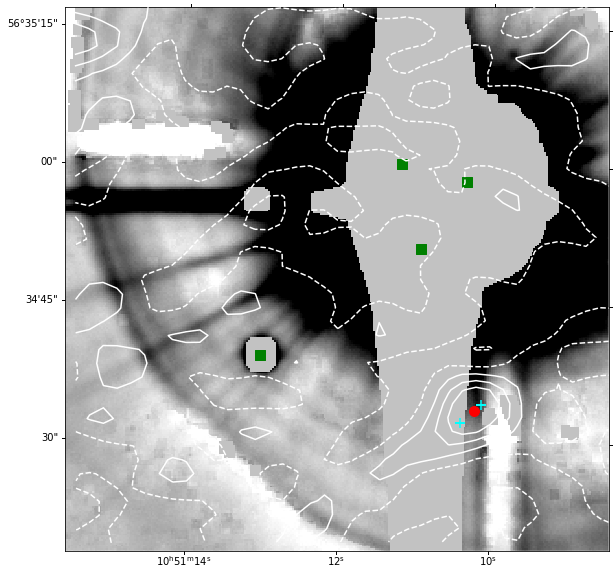

In [45]:
# 162.8,56.57
image_plotting.plot_figure(r_data,[lofar,lofar_gaus,lofar_opt,lofar_opt[snr_mask]],r_wcs,162.8,56.58,plot_params,contour_data=[radim_data,radim_wcs])

plotting 1 sources
plotting 2 sources
plotting 4 sources
plotting 0 sources


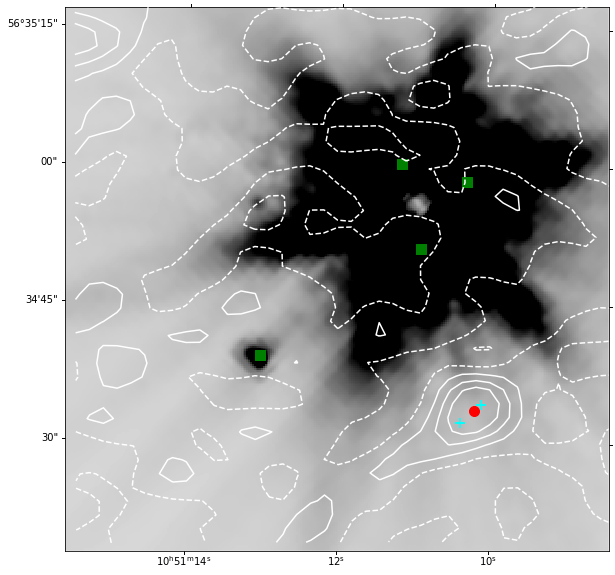

In [46]:
# 162.8,56.57
image_plotting.plot_figure(se_data,[lofar,lofar_gaus,lofar_opt,lofar_opt[snr_mask]],se_wcs,162.8,56.58,plot_params,contour_data=[radim_data,radim_wcs])

In [42]:
ra = lofar_xmatch['RA']
dec = lofar_xmatch['DEC']
mask_overlap = inMoc(ra,dec,moc_overlap)
mask_r = inMoc(ra,dec,moc_r)
mask_sw = inMoc(ra,dec,moc_sw2)

In [43]:
mask_list = [mask_overlap,mask_r,mask_sw]
for mask in mask_list:
    print('number of sources with nan LR is: {}'.format(np.sum(np.isnan(lofar_xmatch[mask]['lr_fin']))))

number of sources with nan LR is: 60
number of sources with nan LR is: 4784
number of sources with nan LR is: 487


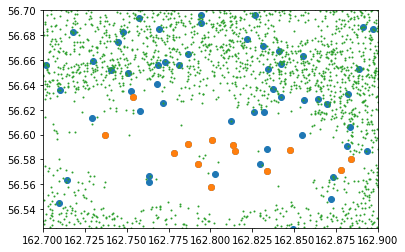

In [44]:
ra = lofar_xmatch['RA'][mask_overlap]
dec = lofar_xmatch['DEC'][mask_overlap]

x = ra
y = dec
plt.scatter(x,y)

x = ra[np.isnan(lofar_xmatch[mask_overlap]['lr_fin'])]
y = dec[np.isnan(lofar_xmatch[mask_overlap]['lr_fin'])]
plt.scatter(x,y)

ra_opt = lofar_opt['ra']#[::10]
dec_opt = lofar_opt['dec']#[::10]
x = ra_opt
y = dec_opt
plt.scatter(x,y,s=1)


plt.xlim(162.7,162.9)
plt.ylim(56.525,56.7)
plt.show()

In [ ]:
len(lofar_xmatch[mask_overlap])